# 선형 회귀

## 기본 선형 회귀

### 원리

`y_prediction = w[0]*x[0] + w[1]*x[1] + ... + w[p]*x[p] +b`

y_pridict : 예측값<br>
x[n]      : 데이터 포인트의 n번쨰 특성값<br>
w, b      : 학습할 파라미터<br><br>

기준      : 최소제곱법, mean((y_predict-y)^2) 를 최소화

w[0]: 0.393906  b: -0.031804


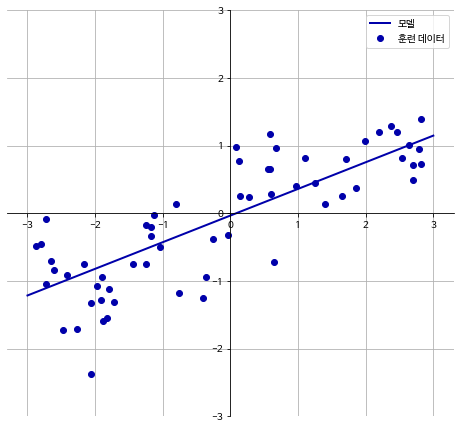

In [1]:
from ml1.preamble import*

mglearn.plots.plot_linear_regression_wave()

### 코드

* 저차원 데이터

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

print('w :',lr.coef_)
print('b :', lr.intercept_)

w : [0.394]
b : -0.031804343026759746


In [3]:
print(f'훈련 세트 점수 : {lr.score(X_train, y_train):.2f}')
print(f'테스트 세트 점수 : {lr.score(X_test, y_test):.2f}')

훈련 세트 점수 : 0.67
테스트 세트 점수 : 0.66


* 고차원 데이터

In [4]:
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)
print(f'훈련 세트 점수 : {lr.score(X_train, y_train):.2f}')
print(f'테스트 세트 점수 : {lr.score(X_test, y_test):.2f}')

훈련 세트 점수 : 0.95
테스트 세트 점수 : 0.61


**=> 저차원일수록 과소적합되고 고차원일수록 과대적합**

## 리지 회귀

### 원리


* 기존 선형회귀는 복잡도를 제어할 방법이 없음 => 규제 추가<br><br>

* 방식 : 평균제곱오차식에 `alpha*sum(w^2)` 를 추가 => alpha를 크게하면 w가 0에 가깝게 학습되고 더 일반화 시킬수 있음


### 코드

In [5]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)     # default alpha = 1
print(f'훈련 세트 점수 : {ridge.score(X_train, y_train):.2f}')
print(f'테스트 세트 점수 : {ridge.score(X_test, y_test):.2f}')

훈련 세트 점수 : 0.89
테스트 세트 점수 : 0.75


### 분석

* alpha 에 따른 coef_의 변화

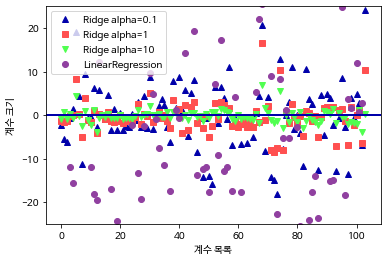

In [6]:
for alpha, marker in zip([0.1, 1, 10], ['^','s','v']):
    ridge = Ridge(alpha = alpha).fit(X_train, y_train)
    plt.plot(ridge.coef_,marker, label= f'Ridge alpha={alpha}')
plt.plot(lr.coef_, 'o', label='LinearRegression')
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
plt.axhline(0)
plt.ylim(-25,25)
plt.legend()

=> alpha가 커질수록 0에 가까워짐<br><br>

* alpha에 따른 train_accuracy, test_accuracy 의 변화

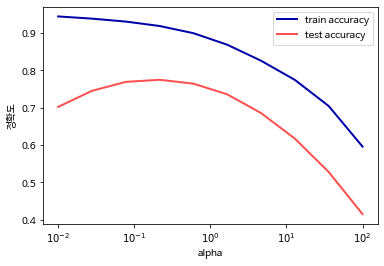

In [7]:
train_accuracy, test_accuracy = [], []
alpha_range = np.logspace(-2,2,10)
for alpha in alpha_range:
    ridge = Ridge(alpha = alpha).fit(X_train, y_train)
    train_accuracy.append(ridge.score(X_train, y_train))
    test_accuracy.append(ridge.score(X_test, y_test))
plt.plot(alpha_range, train_accuracy, label = 'train accuracy')
plt.plot(alpha_range, test_accuracy, label = 'test accuracy')
plt.xscale('log')
plt.xlabel("alpha")
plt.ylabel("정확도")
plt.minorticks_off()
plt.xticks(fontname="DejaVu Sans")
plt.legend()
plt.show()

=> alpha가 작으면 과대적합, alpha가 크면 과소적합<br><br>

* 고정된 alpah에 대해서 훈련 세트의 크기에 따른 변화(학습 곡선)

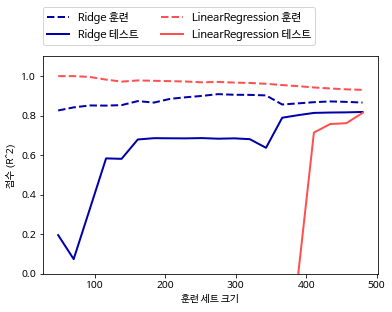

In [8]:
mglearn.plots.plot_ridge_n_samples()

=> 전반적으로 Ridge가 성능이 더 좋지만 훈련세트가 많아질수록 규제의 효과가 감소됨

## 라소 회귀

### 원리

* 또 다른 규제 방법. Ridge는 계수가 0이 되지 않지만, Lasso는 0이 될수 있음. => 분석이 쉬워짐<br><br>

* 방식 : 평균제곱오차식에 `alpha*sum(|w|)` 를 추가 => alpha를 크게하면 w가 0에 가깝게 학습되고 더 일반화 시킬수 있음


### 코드

In [9]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1, max_iter=100).fit(X_train,y_train)    # alpha를 줄일려면 max_iter를 늘려야 함
print(f'훈련 세트 점수 : {lasso.score(X_train, y_train):.2f}')
print(f'테스트 세트 점수 : {lasso.score(X_test, y_test):.2f}')
print(f'사용된 특성의 갯수 : {np.sum(lasso.coef_ != 0)}')
print(f'최적화까지의 반복 횟수 : {lasso.n_iter_}')

훈련 세트 점수 : 0.29
테스트 세트 점수 : 0.21
사용된 특성의 갯수 : 4
최적화까지의 반복 횟수 : 34


### 분석

* alpha 값에 따른 coef_의 변화

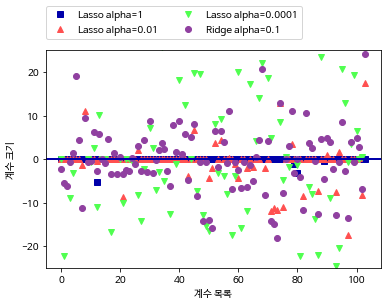

In [10]:
for alpha, max_iter, marker in zip([1, .01, .0001], [100, 10000,100000 ], ['s','^','v']):
    lasso = Lasso(alpha = alpha, max_iter=max_iter).fit(X_train, y_train)
    plt.plot(lasso.coef_,marker, label= f'Lasso alpha={alpha}')
ridge = Ridge(alpha=0.1).fit(X_train, y_train)
plt.plot(ridge.coef_, 'o', label='Ridge alpha=0.1')
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
plt.axhline(0)
plt.ylim(-25,25)
plt.legend(ncol=2, loc=(0,1.05))

=> alpha가 크면 0이 되는 계수가 많아짐<br><br>

## ElasticNet 회귀

### 원리

Lasso 와 Ridge의 페널티를 결합<br>
l1_ratio 는 l1 규제의 비율, 1-l1_ratio 는 12 규제의 비율

In [11]:
from sklearn.linear_model import ElasticNet
reg = ElasticNet(alpha=0.001, l1_ratio= 0.5, max_iter=100000).fit(X_train,y_train)
print(f'훈련 세트 점수 : {reg.score(X_train, y_train):.2f}')
print(f'테스트 세트 점수 : {reg.score(X_test, y_test):.2f}')
print(f'사용된 특성의 갯수 : {np.sum(reg.coef_ != 0)}')
print(f'최적화까지의 반복 횟수 : {reg.n_iter_}')

훈련 세트 점수 : 0.92
테스트 세트 점수 : 0.78
사용된 특성의 갯수 : 94
최적화까지의 반복 횟수 : 7376


# 선형 분류

## 이진 분류

### 원리

`w[0]*x[0] + w[1]*x[1] + ... + w[p]*x[p] +b > 0` : class =  1<br>
`w[0]*x[0] + w[1]*x[1] + ... + w[p]*x[p] +b < 0` : class = -1,<br><br>
LogisticRegression 과 LinearSVC 이 있음<br>
두 모델 모두 기본 규제로 l2를 씀 : penalty로 변경가능<br>
주요 매개변수는 C로 C값이 높아지면 규제가 감소

### 코드

* LogisticRegression

In [12]:
from sklearn.linear_model import LogisticRegression

X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y)

clf1 = LogisticRegression().fit(X_train, y_train)
print(f'훈련 세트 점수 : {clf1.score(X_train, y_train):.2f}')
print(f'테스트 세트 점수 : {clf1.score(X_test, y_test):.2f}')

훈련 세트 점수 : 0.95
테스트 세트 점수 : 0.86


* LinearSVC

In [13]:
from sklearn.svm import LinearSVC

clf2 = LogisticRegression().fit(X_train, y_train)
print(f'훈련 세트 점수 : {clf2.score(X_train, y_train):.2f}')
print(f'테스트 세트 점수 : {clf2.score(X_test, y_test):.2f}')

훈련 세트 점수 : 0.95
테스트 세트 점수 : 0.86


### 분석

* 결정경계

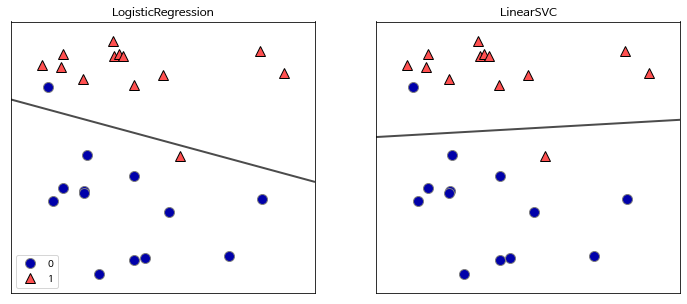

In [14]:
fig, axes = plt.subplots(1,2, figsize=(12,5))
for model, ax in zip([LogisticRegression(), LinearSVC(max_iter=10000)], axes):
    clf = model.fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=0.7)
    mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=ax)
    ax.set_title(clf.__class__.__name__)
axes[0].legend(loc='lower left')

* C에 따른 결정경계 변화

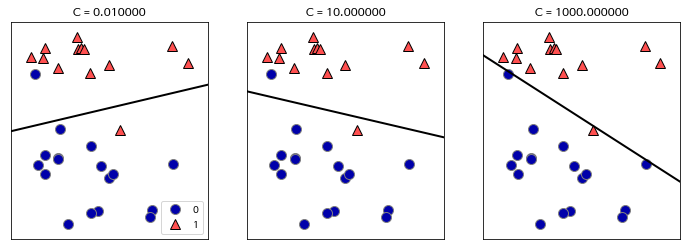

In [15]:
mglearn.plots.plot_linear_svc_regularization()

=> C가 높아질수록 경사가 높아짐<br><br>

* C에 따른 정확도 변화 (cancer data)

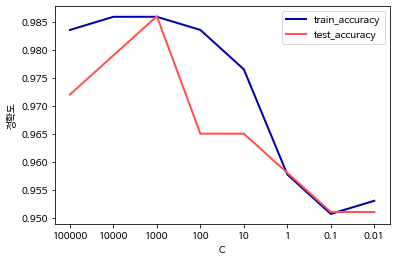

In [16]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
                                                    stratify =cancer.target, random_state = 42)

train_accuracy, test_accuracy = [], []
C_range = [100000,10000, 1000, 100, 10, 1, 0.1, 0.01]
for C in C_range:
    clf = LogisticRegression(C=C, max_iter=10000).fit(X_train, y_train)
    train_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))
plt.plot(train_accuracy, label='train_accuracy')
plt.plot(test_accuracy, label='test_accuracy')
plt.xticks(range(len(C_range)),C_range)
plt.xlabel('C')
plt.ylabel('정확도')
plt.legend()

=> C가 높으면 과대적합, C가 낮으면 과소적합<br><br>

* C 에 따른 coef_ 의 변화

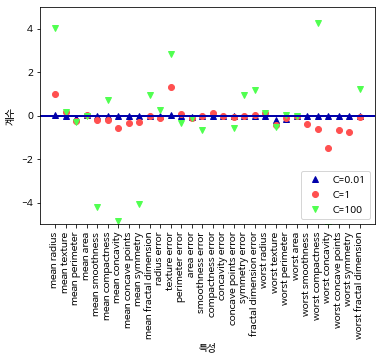

In [17]:
for C, marker in zip([0.01, 1, 100],['^','o','v']):
    clf=LogisticRegression(C=C, max_iter=10000).fit(cancer.data,cancer.target)
    plt.plot(clf.coef_[0], marker, label=f'C={C}')
plt.xticks(range(cancer.data.shape[1]),cancer.feature_names, rotation=90)
plt.axhline(0)
plt.ylim(-5,5)
plt.xlabel('특성')
plt.ylabel('계수')
plt.legend(loc = 'lower right')

=>  C가 작을수록 계수가 0에 가까워짐<br><br>

## 다중 클래스 분류

### 원리

* Logistic을 제외하고 나머지는 일대다 방식으로 이진분류를 확장함
* 클래스 수만큼 이진 분류기를 생성하고 가장 높은 점수를 내는 분류기를 따름

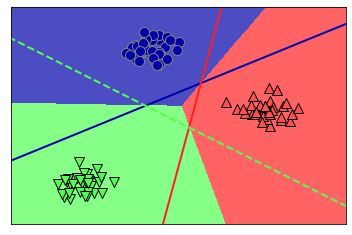

In [24]:
from sklearn.datasets import make_blobs

X,y = make_blobs(random_state=42)
linear_svm = LinearSVC().fit(X,y)
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=0.7)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
line = np.linspace(-15,15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line*coef[0]+intercept)/coef[1], c=color)

# 장단점

## 장점

* 학습속도와 예측이 빠름
* 큰 데이터셋과 희소데이터셋에 잘 작동함 : solver='saga' 로 하면 더욱 빨라짐
* 특성이 많을때 잘 돌아감

## 단점

* 특성이 적을때 다른 모델이 일반화를 더 잘시킴